In [ ]:
#EXCERCISE 1

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,Age,Income($)
Name,,
Rob,27,70000
Michael,29,90000
Mohan,29,61000
Ismail,28,60000
Kory,42,150000


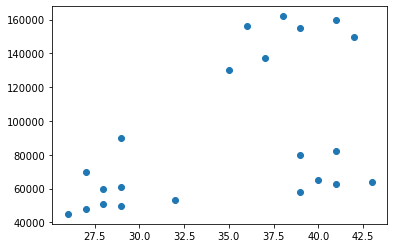

In [5]:
plt.scatter(df['Age'],df['Income($)'])

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [8]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [10]:
df['cluster'] = y_pred
df.head()

,Age,Income($),cluster
Name,,,
Rob,27,70000,2
Michael,29,90000,2
Mohan,29,61000,0
Ismail,28,60000,0
Kory,42,150000,1


In [11]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]


In [15]:
df2

,Age,Income($),cluster
Name,,,
Rob,27,70000,2
Michael,29,90000,2
Alia,39,80000,2
Sid,41,82000,2


No handles with labels found to put in legend.


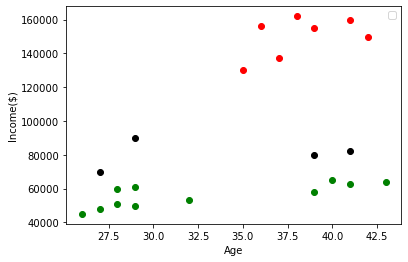

In [16]:
plt.scatter(df0.Age,df0['Income($)'],color='green')
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [20]:
#MAX MIN SCALER
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [21]:
df

,Age,Income($),cluster
Name,,,
Rob,0.058824,0.213675,2
Michael,0.176471,0.384615,2
Mohan,0.176471,0.136752,0
Ismail,0.117647,0.128205,0
Kory,0.941176,0.897436,1
Gautam,0.764706,0.940171,1
David,0.882353,0.982906,1
Andrea,0.705882,1.000000,1
Brad,0.588235,0.948718,1


In [24]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [25]:
df['cluster'] = y_pred
df.head()

,Age,Income($),cluster
Name,,,
Rob,0.058824,0.213675,1
Michael,0.176471,0.384615,1
Mohan,0.176471,0.136752,1
Ismail,0.117647,0.128205,1
Kory,0.941176,0.897436,2


In [28]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

No handles with labels found to put in legend.


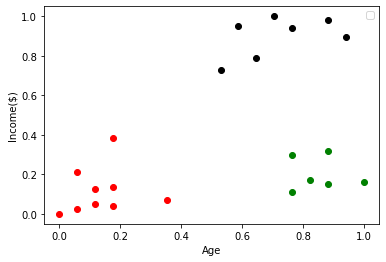

In [30]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age,df0['Income($)'],color='green')
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [31]:
km

KMeans(n_clusters=3)

In [34]:
#Elbow Plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [35]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2766936276300279,
 0.21578607765873023,
 0.1685851223602976,
 0.13265419827245162,
 0.10497488680620906]

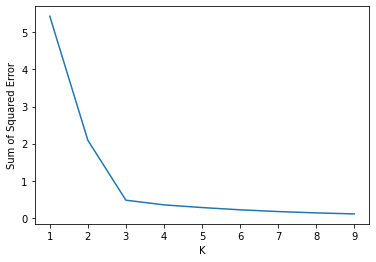

In [37]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)

In [54]:
#EXCERCISE 2

In [55]:
from sklearn.datasets import load_iris
iris = load_iris()

In [56]:
df  = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [60]:
km = KMeans(n_clusters=3)
y_p = km.fit_predict(df)
y_p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [61]:
df['cluster'] = y_p
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0


In [63]:
df.cluster.unique()

array([0, 1, 2], dtype=int32)

In [65]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

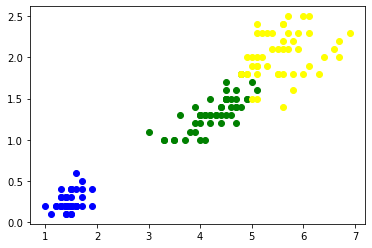

In [67]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='blue')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='yellow')

In [68]:
#Elbow Plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

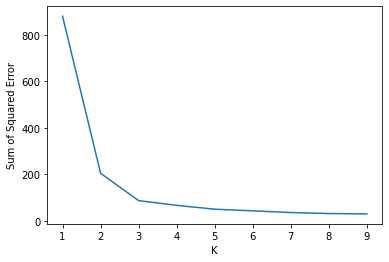

In [69]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng,sse)